# Исследование популярности компьютерных игр


**Цель исследования:**

* Отработать процесс прогнозирования продаж на следующий год по данным о продажах прошлых лет.
* Выявить закономерности, определяющие успешность игры.

**Ход исследования**

В распоряжении имеются данные об играх из открытого источника. Данные расположены в файле `'./datasets/games.csv'`. Известно, что таблица с данными должна содержать следующие столбцы:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Предоставленные данные должны содержать информацию о продажах до 2016 года. Также было сказано, что данные за 2016 год могут быть неполными, возможно, в данных есть и другие неточности, поэтому сначала я проведу обзор данных. Далее, на этапе предобработки, данные будут проверены на наличие ошибок, и по возможности эти ошибки будут исправлены. 

Затем на основании суммарных продаж будет найден временной период, данные о котором влияют на продажи в следующем году. Далее, для достижения целей исследования будет произведён исследовательский анализ данных, и составлен портрет пользователей для каждого региона, а также будут сформулированы и проверены необходимые гипотезы.


Таким образом, моё исследование будет состоять из следующих 7-и этапов:

1. [Загрузка и обзор данных.](#Загрузка-и-обзор-данных.)
2. [Предобработка данных.](#Предобработка-данных.)
3. [Рассчёт суммарных продаж во всех регионах.](#Рассчёт-суммарных-продаж-во-всех-регионах.)
4. [Исследовательский анализ данных.](#Исследовательский-анализ-данных.)
5. [Сравнение портретов пользователей каждого региона.](#Сравнение-портретов-пользователей-каждого-региона.)
6. [Проверка гипотез.](#Проверка-гипотез.)
7. [Общий вывод.](#Общий-вывод.)

In [73]:
# Загрузка необходимых модулей и библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import os

In [74]:
# Стиль графиков
sns.set_style('whitegrid', {'grid.linestyle': '--'})

## Загрузка и обзор данных.

In [75]:
dataset_path = os.path.join(os.path.abspath(''), 'datasets/games.csv')
data = pd.read_csv(dataset_path)

In [76]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Исследуем таблицу на наличие пропусков и несоответствия типов данных.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** таблица загружена успешно, все заявленные столбцы присутствуют, но можем наблюдать множественные пропуски и неверные типы данных в нескольких столбцах; также названия столбцов заданы некорректно.

## Предобработка данных.

В данных обнаружены пропуски и неверные типы данных, это частые ошибки, с которыми надо уметь бороться, по возможности эти ошибки устраняются на этапе предобработки данных, если же такой возможности нет, то полезно хотя бы знать о наличии этих ошибок. 

### Приведение имён столбцов к нижнему регистру.

При работе с языком `python` во время выбора имени переменных, функций - и в том числе названий столбцов таблицы - следует придерживаться общепринятого стиля "snake_case".

>`snake_case` - стиль написания составных слов, при котором пробелы заменяются символом `_`, и всё составное слово записано в нижнем регистре.

Посмотрим на названия столбцов.

In [78]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В данном случае для приведения названий столбцов к "snake_case" остаётся только привести названия столбцов к нижнему регистру.

In [79]:
data.columns = map(str.lower, data.columns)
print('Названия столбцов после изменений:')
print(*data.columns, sep='\n')

Названия столбцов после изменений:
name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


Названия столбцов были успешно приведены к "snake_case".

### Обработка пропусков и преобразование столбцов к верному типу данных.

#### Название игры.

In [80]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У 2-х игр нет названия, но о них вообще очень мало информации: известны только год продажи, платформа, и продажи - поэтому отбросим эти игры.

In [81]:
data = data[~data['name'].isna()]

#### Жанр.

In [82]:
print('Количество игр без жанра:', data[data['genre'].isna()].shape[0])

Количество игр без жанра: 0


Отброшенные ранее игры без названия и были теми самыми играми без жанра.

#### Год выпуска.

In [83]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Заметим, что в названии некоторых игр содержится год, может быть, по нему удастся восстановить год игры. Посмотрим на такие игры.

In [84]:
data_filtered = data[(data['year_of_release'].isna()) & (data['name'].str.contains('20') | (data['name'].str.contains('19')))]
data_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [85]:
print('Всего игр с некоторым годом в названии:', data_filtered.shape[0] - 1)

Всего игр с некоторым годом в названии: 18


In [86]:
print('Доля данных с пропусками:', round(data['year_of_release'].isna().sum() / data.shape[0], 3))

Доля данных с пропусками: 0.016


Таких игр оказалось совсем немного, при этом игра "Jet X20" попала сюда случайно. На самом деле точно оценить год выпуска этих игр непросто, потому что многие игры связаны со спортом и гонками, а такие игры называют в честь спортивного события, которое случится через год после выпуска, но иногда игры выпускают год в год с этим событием. Так как всего таких игр 18, и год выпуска других игр без сторонних данных оценить не получится, отбросим пропуски (около 1.6 % данных).

In [87]:
data = data[~data['year_of_release'].isna()]
data = data.reset_index(drop=True)

In [88]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Самая ранний год выпуска игры - 1980-й год, а самый поздний - 2016-й. Тип данных этого столбца - числа с плавающей запятой. Скорее всего, данные были заполнены верно, но при заполнении пользователем или программой был выбран неверный тип данных. Так как столбец содержит год выпуска игры его стоит привести к типу `int`, натуральным числам.

In [89]:
data['year_of_release'] = data['year_of_release'].astype('int')

#### Отзывы игроков и критиков.

In [90]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Значения оценок критиков действительно не выходят за переделы отрезка $[0, 100]$. Ранее было установлено, что столбец с отзывами пользователей имеет строковой тип данных, изучим его.

In [91]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как оказалось, это неспроста: в столбце встречается значение `tbd`, to be delivered - (с англ.) подлежит уточнению. То есть это тоже игры, для которых неизвестны отзывы игроков. Приведём столбец к числовму типу данных, но перед эти преобразуем 'tbd' к None.

In [92]:
# Комментарий ревьюера
data[118:121]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
118,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.3,T
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
120,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,3.11,2.26,0.28,1.03,94.0,8.4,M


In [93]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)

In [94]:
# Комментарий ревьюера
data[118:121]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
118,Uncharted 3: Drake's Deception,PS3,2011,Action,2.77,2.75,0.19,1.03,92.0,8.3,T
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,NaN,E
120,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,3.11,2.26,0.28,1.03,94.0,8.4,M


К сожалению отзывы не коррелируют ни с чем в этой таблице: количество продаж не отражает качество игры, то же касается жанра и года выхода игры, также известно, что в основном игроки и критики часто дают очень разные оценки играм, поэтому пропуски заполнить не удастся.

In [95]:
data.corr(numeric_only=True)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411,-0.267851
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.240083,0.085549
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.221276,0.055530
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.153474,0.126372
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.198410,0.056935
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000,0.579671
user_score,-0.267851,0.085549,0.055530,0.126372,0.056935,0.579671,1.000000


Исследование последних двух столбцов или строк матрицы корреляций приводит нас к выводу, что наибольшая корреляция наблюдается между отзывами пользователей и критиков, но, как и ожидалось, она всё равно слишком мала, чтобы мы могли уверенно утверждать о прямой линейной связи величин.

#### Возрастная категория.

Рассмотрим, какие жанры и возрастные категории присутствуют в этих данных.

In [96]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [97]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

[Согласно информации на сайте ESRB](https://www.esrb.org/history/) в 1998 году категория 'K-A' была переименована в 'E'.

In [98]:
data[data['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
650,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
892,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16410,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Действительно, эти игры выпущены до 1998-го года. Заменим эту категорию в нашей таблице в соответствии с корректировками 1998-го года.

In [99]:
data['rating'] = data['rating'].replace('K-A', 'E')

Посмотрим на данные с пропусками.

In [100]:
data[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [101]:
data[data['rating'].isna()].tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16443,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Мы могли бы попробовать дать всем шутерам рейтинг 'для взрослых', но это будет некорректно, потому что в том жанре встречаются игры и для детей, как, например, 'Duck Hunt'. Также видно, что в пропусках встречаются игры разных рейтингов, например, 'Pokemon Red' - игра для всех возрастов, а игра 'Samurai Warriors: Sanada Maru' имеет рейтинг 'T', [что указано на сайте ESRB](https://www.esrb.org/ratings/34857/samurai-warriorsr-spirit-of-sanada/). Помимо этого некоторые издатели не запрашивают рейтинг ESRB.

Таким образом, корректно заполнить пропуски без дополнительных данных не удастся, поэтому пока заполним их строкой 'NR' - no rating.

In [102]:
data['rating'] = data['rating'].fillna('NR')

### Поиск и обработка дубликатов.

Сначала проверим данные на наличие явных дубликатов.

In [103]:
data.duplicated().sum()

0

Явных дубликатов в данных нет, но в данных могли оказаться неявные дубликаты, например, одна и та же игра могла попасть в данные с разными показателями продаж. Попробуем найти строки, в которых содержатся игры с одинаковым названием, платформой, и годом выпуска. 

In [104]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [105]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Одна такая игра нашлась, в записях совпадает всё кроме продаж. Судя по продажам на других платформах, игра достаточно популярна, значения из второй записи не могут быть верны. Возможно, игру добавили с примерно нулевыми продажами и хотели их заполнить позже, но потом забыли, и создали новую запись с той же игрой.

In [106]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

### Вывод.

* Имена столбцов были приведены к стилю `snake_case`.
* Всего только у 2-х игр не было жанра и названия, они были отброшены, так как их рейтинги тоже оставались неизвестны. Это были очень старые игры, возможно, все данные об этих играх были утеряны одновременно, например, при копировании информации о них из другой базы данных, и далее их названия восстановить не удалось.
* Пропуски в столбце года выпуска игр заполнить не удалось, данные с пропусками были отброшены. Тип данных был исправлен, скорее всего, данные были заполнены верными значениями, но при заполнении пользователем или программой был выбран неверный тип данных. Возможно пропуски возникли из-за неправильного типа данных, например, таблица при получении целочисленного значения в столбец года выпуска, не приводила его к вещественному типу, а оставляла пропуск. 
* Отзывы игроков содержали значение `tbd`, to be delivered - (с англ.) подлежит уточнению. Это значение было отброшено, и столбец был преобразован к типу `int`. К сожалению отзывы не коррелируют ни с чем в этой таблице: количество продаж не отражает качество игры, то же касается жанра и года выхода игры. Также известно, что игроки и критики часто дают очень разные оценки играм, поэтому пропуски заполнить не удалось. Пропуски могли появится из-за того, что на тех ресурсах, откуда берут отзывы игроков и критиков, их было недостаточно.
* В данных встречалась устаревшая возрастная категория 'K-A', которая на данный момент называется 'E', в связи с этим я заменил значение 'K-A' на 'E' таблице. Пропуски были помечены строкой 'NR' (no rating). Скорее всего, большинство пропусков указывают на игры без рейтинга ESRB. Рейтинг ESRB используется только в Канаде, Америке, и Мексике. Учитывая, что в этих данных есть игры из Европы, Японии, и других регионов, неудивительно, что, у части игр нет рейтинга.
* В данных был найден только один неявный дубликат, совпадало всё кроме продаж. Возможно, игру добавили с примерно нулевыми продажами и хотели их заполнить позже, но потом забыли, и создали новую запись с той же игрой.

In [107]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
------------

## Рассчёт суммарных продаж во всех регионах.

В дальнейшем нам понадобится информация о суммарных продажах игр, добавим к датафрейму дополнительный столбец `total_sales` с этой информацией.

In [108]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [109]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


## Исследовательский анализ данных.

Как было выявлено ранее, данные содержат информацию о продажах игр за период от 1980-го до 2016-го года. Игровая индустрия претерпела множество изменений за этот период, поэтому неактуальная на данный момент информация о продажах игр может негативано сказаться на предсказании продаж. Простой и эффективный способ определения периода, влияющего на продажи игр в будущем, - это исследование актуальности платформ. 

Таким образом, анализ данных будет произведён в два этапа:

1. Нахождение актуального периода продаж - того периода, данные из которого помогут эффективно составить прогноз на 2017 год.
2. Исследование данных о продажах за актуальный период.

### Поиск актуального периода продаж.

#### Выпуск игр по годам.

Посмотрим сколько выпусков игр приходится на каждый год.

In [110]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

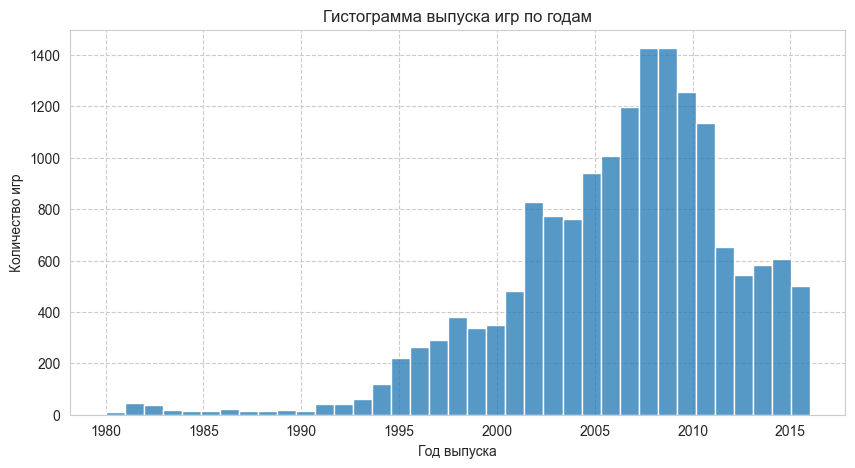

In [111]:
plt.figure(figsize=(10, 5))
sns.histplot(data['year_of_release'], bins=37).set(title='Гистограмма выпуска игр по годам',
                                         xlabel='Год выпуска', ylabel='Количество игр');

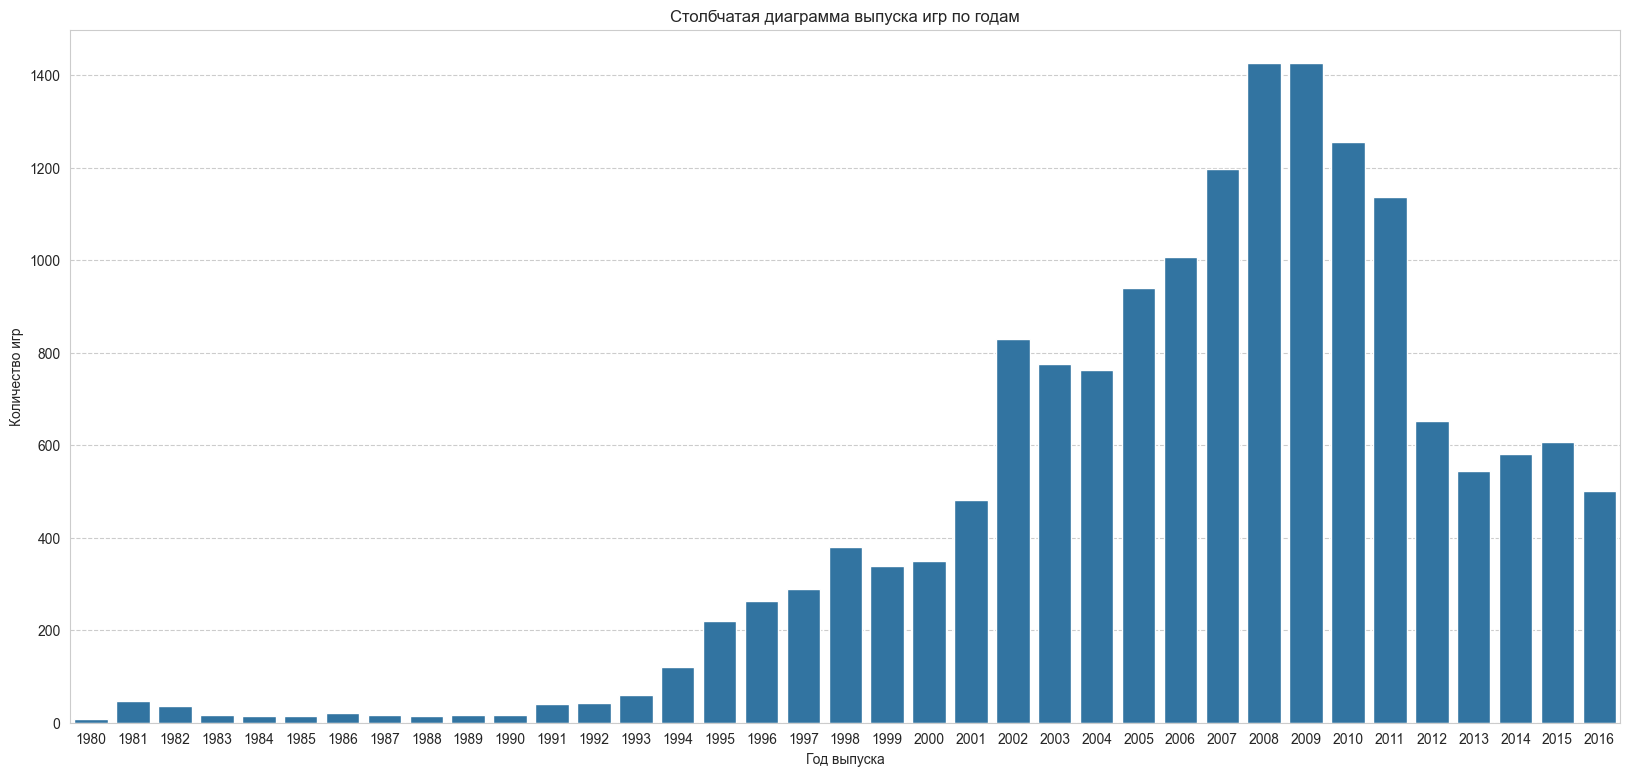

In [112]:
years_count = data.groupby('year_of_release')['name'].count()
plt.figure(figsize=(20, 9))
sns.barplot(x=years_count.index, y=years_count).set(title='Столбчатая диаграмма выпуска игр по годам',
                                         xlabel='Год выпуска', ylabel='Количество игр');

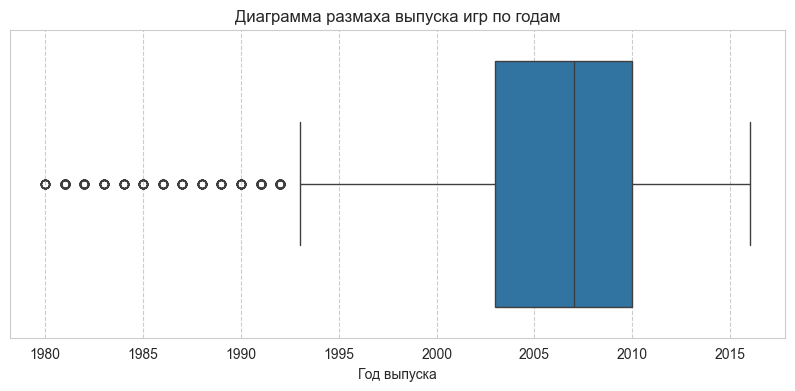

In [113]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['year_of_release']).set(title='Диаграмма размаха выпуска игр по годам', xlabel='Год выпуска');

Большая часть игр выпущена после 1994 года. До 2009 года наблюдается ежегодный рост выпуска игр, а затем следует упадок.

#### Продолжительность популярности платформ.

Найдём самые популярные платформы за всё время, и изучим их продажи по годам.

In [114]:
# Строим общие продажи для каждой платформы по годам.
# Далее рассчитываем сумму всех продаж.
# Сортируем по сумме, и находим 10 самых популярных платформ.
popular_platforms = data.pivot_table(index='platform', values='total_sales', columns='year_of_release',  aggfunc='sum', fill_value=0)
popular_platforms['total_sales'] = popular_platforms.sum(axis=1)
popular_platforms = popular_platforms.sort_values(by='total_sales', ascending=False)
popular_platforms.head(10)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,,,,,,,,,,,,,,,
PS2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
X360,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60,931.33
Wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,...,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.78
PS,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,727.58
PS4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
GBA,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
PSP,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53


Заметим, что у платформы DS есть продажи в 1985-м году, но на самом деле в этом году платформы ещё не существовало.

Вычислим сроки жизни платформ, и изучим платформы с самыми длинными сроками жизни. Может быть, удастся найти больше аномальных платформ.

In [115]:
platforms_lifespan = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platforms_lifespan['lifespan'] = platforms_lifespan['max'] - platforms_lifespan['min'] + 1
platforms_lifespan.columns = ['first_year', 'last_year', 'lifespan']
platforms_lifespan.sort_values(by='lifespan', ascending=False).head()

,first_year,last_year,lifespan
platform,,,
PC,1985,2016,32
DS,1985,2013,29
GB,1988,2001,14
X360,2005,2016,12
PSP,2004,2015,12


Другие "сроки жизни" платформ вполне характерны. Посмотрим подробнее на годы выпуска игр для DS.

In [116]:
popular_platforms.loc['DS'].head(24)

year_of_release
1980    0.00
1981    0.00
1982    0.00
1983    0.00
1984    0.00
1985    0.02
1986    0.00
1987    0.00
1988    0.00
1989    0.00
1990    0.00
1991    0.00
1992    0.00
1993    0.00
1994    0.00
1995    0.00
1996    0.00
1997    0.00
1998    0.00
1999    0.00
2000    0.00
2001    0.00
2002    0.00
2003    0.00
Name: DS, dtype: float64

Видимо аномалия наблюдаемая в 1985-м году единственна, изучим эту запись.

In [117]:
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NR,0.02


Отбросим эту игру из данных.

In [118]:
data = data.query('not (platform == "DS" and year_of_release == 1985)')

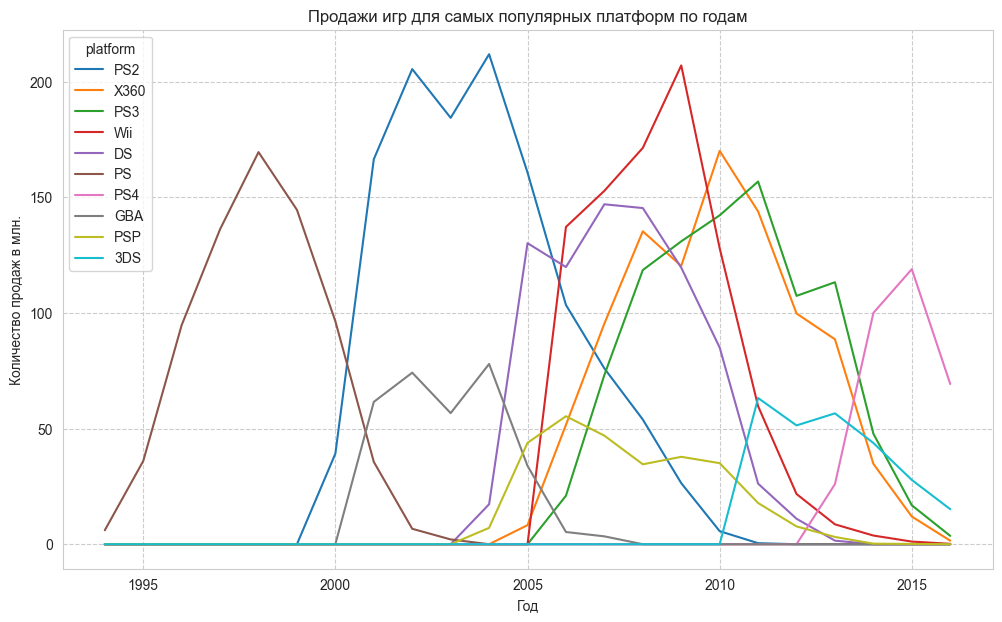

In [119]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=popular_platforms.head(10).loc[:, 1994:2016].transpose(), dashes=False).set(
             title='Продажи игр для самых популярных платформ по годам',
             xlabel='Год',
             ylabel='Количество продаж в млн.'
             );

Из построенных графиков видно, что продажи на популярных консолях падают к 2016-у году.

Вычислим промежуток за который, платформы в среднем достигают пика продаж.

In [120]:
# Находим, в каком году достигается пик продаж
popular_platforms['best_year'] = popular_platforms.loc[:, :2016].idxmax(axis=1)
# Объединяем в с датафреймом, где уже вычислен год появления платформы
popular_platforms = popular_platforms.join(platforms_lifespan)
# Вычисляем промежуток времени:
# аналогично добавляю единичку, чтобы захватить обе границы
popular_platforms['time_to_reach_peak'] = popular_platforms['best_year'] - popular_platforms['first_year'] + 1
popular_platforms['time_to_reach_peak'].median()

3.0

#### Вывод.

На основании исследования о продолжительности популярности платформ можно заключить, что актуальный период продаж составляет 3 года. В среднем платформы набирают продажи первые 3 года, и к 3-му году продажи достигают своего пика, а потом начинают падать.

In [121]:
data = data[data['year_of_release'] > 2013]
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.5+ KB


Данных стало существенно меньше, но зато они более репрезентативны для текущего состояния игрового рынка.

### Исследование актуального периода продаж.

#### Самые перспективные платформы.

In [122]:
print('Всего осталось платформ:', len(data['platform'].unique()))

Всего осталось платформ: 10


Изучим оставшиеся платформы.

In [123]:
# Уже была похожая таблица.
# Строим общие продажи для каждой платформы по годам.
# Далее рассчитываем сумму всех продаж.
# Сортируем по сумме всех продаж.
popular_platforms = data.pivot_table(index='platform', values='total_sales', columns='year_of_release',  aggfunc='sum', fill_value=0)
popular_platforms['total_sales'] = popular_platforms.sum(axis=1)
popular_platforms = popular_platforms.sort_values(by='total_sales', ascending=False)
popular_platforms

year_of_release,2014,2015,2016,total_sales
platform,,,,
PS4,100.00,118.90,69.25,288.15
XOne,54.07,60.14,26.15,140.36
3DS,43.76,27.78,15.14,86.68
PS3,47.76,16.82,3.60,68.18
X360,34.74,11.96,1.52,48.22
WiiU,22.03,16.35,4.60,42.98
PC,13.28,8.52,5.25,27.05
PSV,11.90,6.25,4.25,22.40
Wii,3.75,1.14,0.18,5.07


По таблице видно, что Wii и PSP уже не так актуальны к 2016 году.

Таблица выше отражает самые популярные платформы по общему количеству продаж игр для них за промежуток с 2006-го года до 2016-го года, но намного интереснее отследить динамику продаж за эти года. Построим графики, которые помогут это сделать.

In [124]:
list(popular_platforms.columns[:-1])

[2014, 2015, 2016]

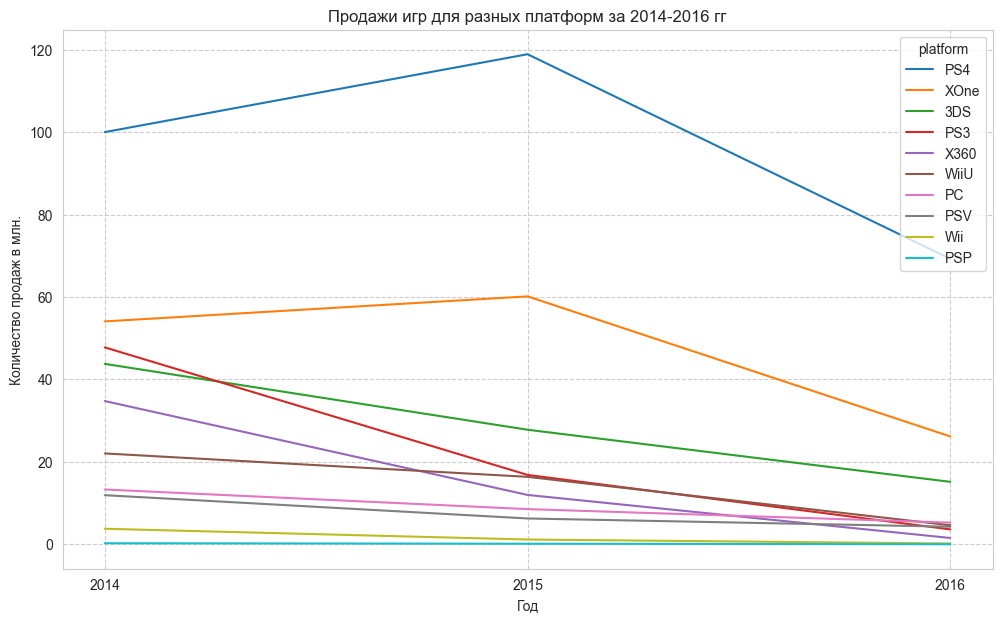

In [125]:
plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=popular_platforms.loc[:, :2016].transpose(), dashes=False)
ax.set(
        title='Продажи игр для разных платформ за 2014-2016 гг',
        xlabel='Год',
        ylabel='Количество продаж в млн.'
)
# Без set_ticks добавляет значения с плавающей запятой на график
ax.set_xticks(list(popular_platforms.columns[:-1]));


**Вывод:**
* Графики показывают, что последний несколько лет продажи игр падают на всех платформах, особенно с 2015-го по 2016-й год.
* Самыми многообещающими платформами на 2017 год являются: PS4, XOne, 3DS - они достаточно новые, и продажи игр для этих консолей в период с 2014-го по 2016-ый первосходят продажи игр для других платформ.

#### Глобальные продажи игр.

Построим диаграммы размаха для каждой из консолей.

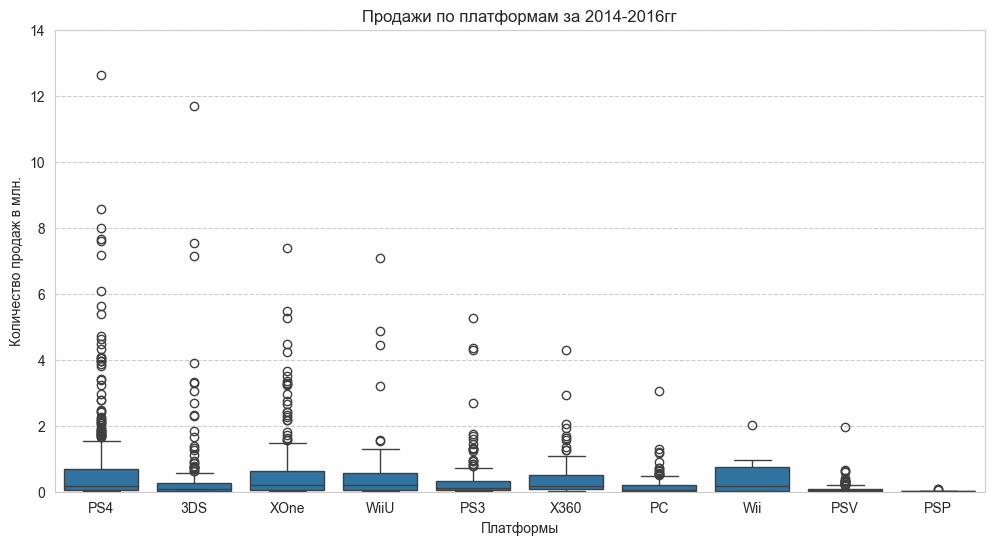

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='platform', y='total_sales').set(
    ylim=(0, 14),
    title='Продажи по платформам за 2014-2016гг',
    ylabel='Количество продаж в млн.',
    xlabel='Платформы'
);

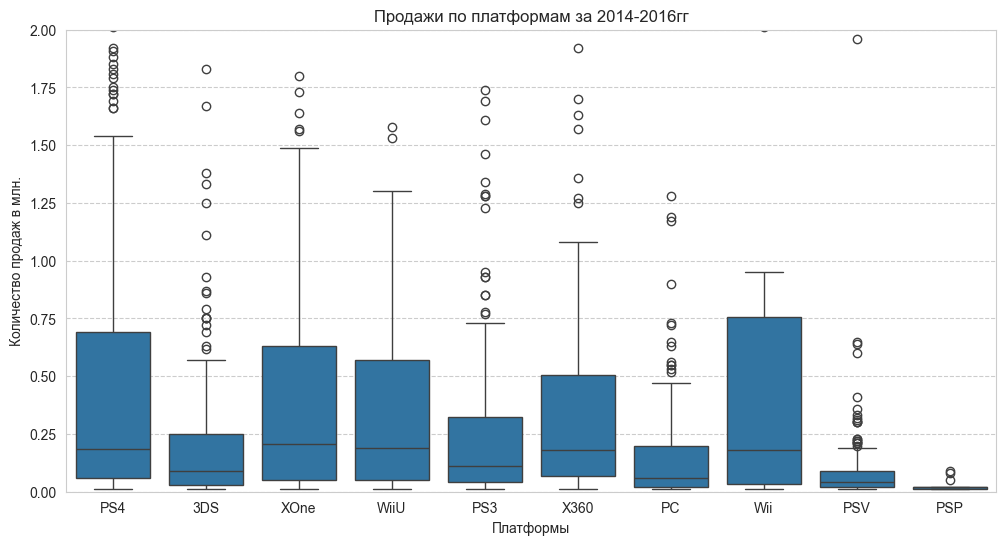

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='platform', y='total_sales').set(
    ylim=(0, 2),
    title='Продажи по платформам за 2014-2016гг',
    ylabel='Количество продаж в млн.',
    xlabel='Платформы'
);

**Вывод:** согласно диаграммам размаха стоит внести корректировку - игры для PS4 и XOne более 'выгодны', чем игры для 3DS, в том смысле, что, если отбросить редкие исключения, то популярные игры для PS4 и XOne продаются в больших экземплярах, чем популярные игры для 3DS. Также можно наблюдать, что редкие очень успешные игры встречаются на платформах: PS4, 3DS, XOne, WiiU.

#### Связь отзывов пользователей и критиков с продажами игр на актуальных платформах.

Исследуем связь отзывов и продаж игр по платформам. Для этого построим графики зависимости и вычислим кореляции для 5 популярных платформ.

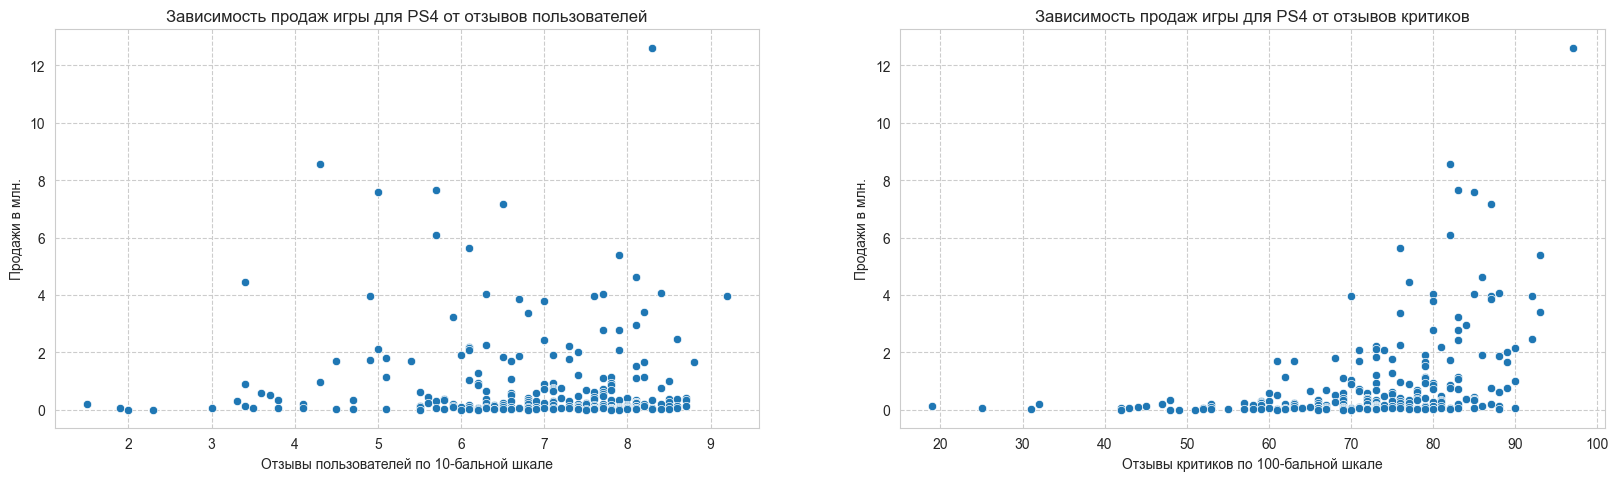

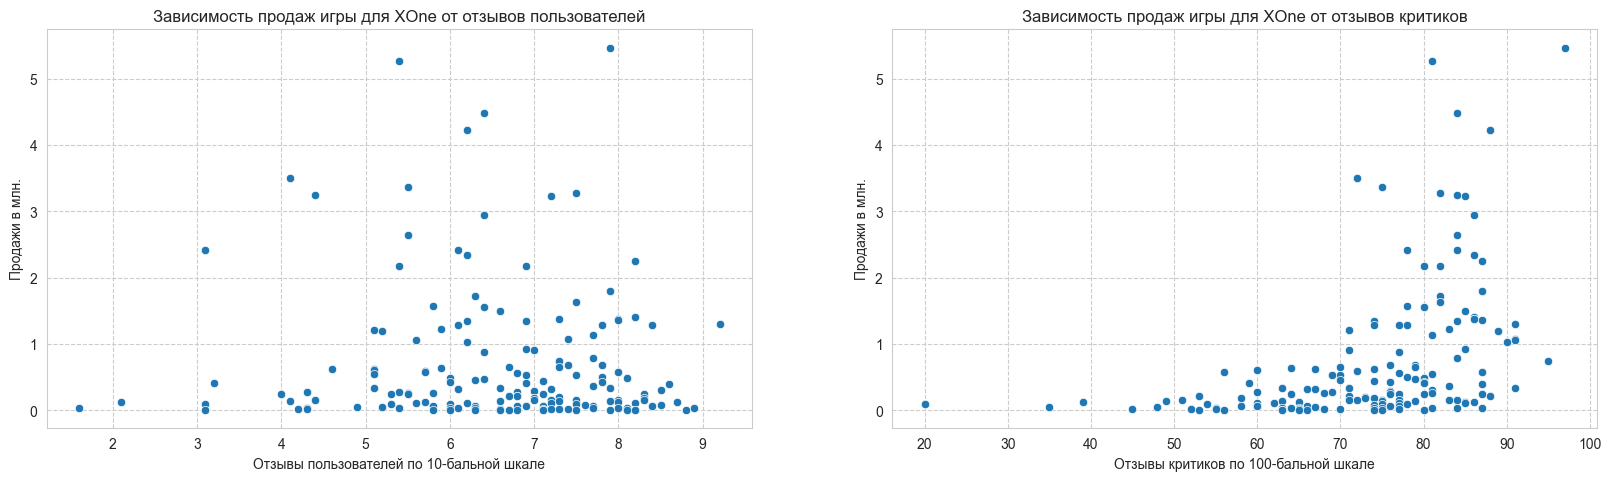

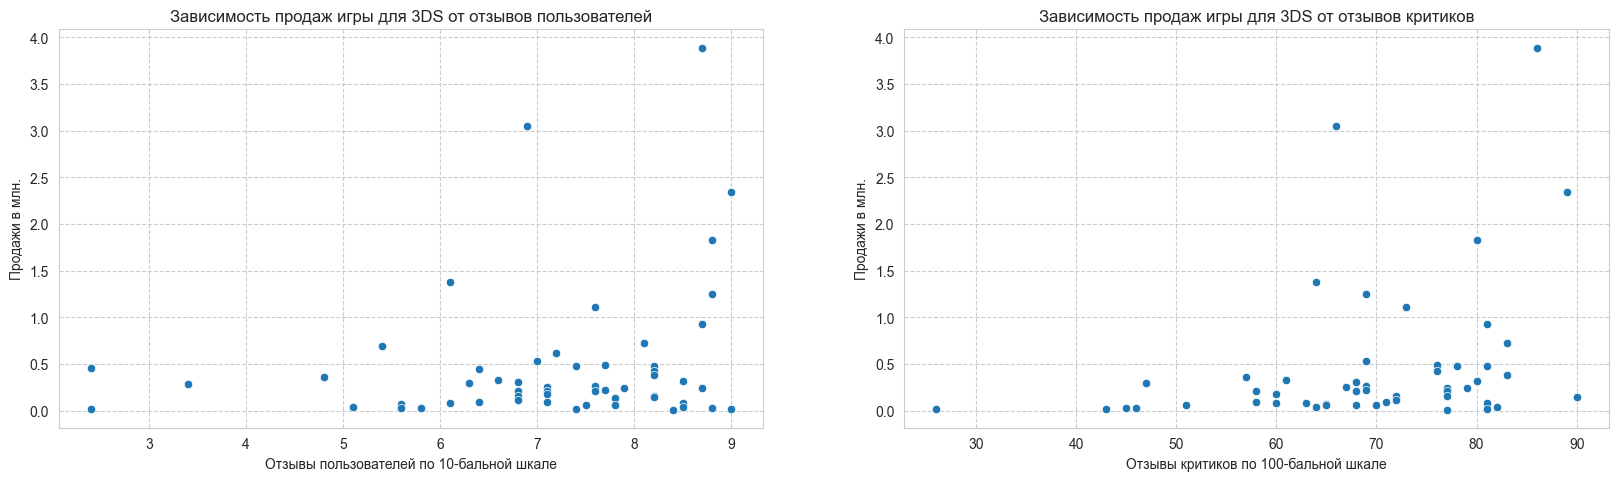

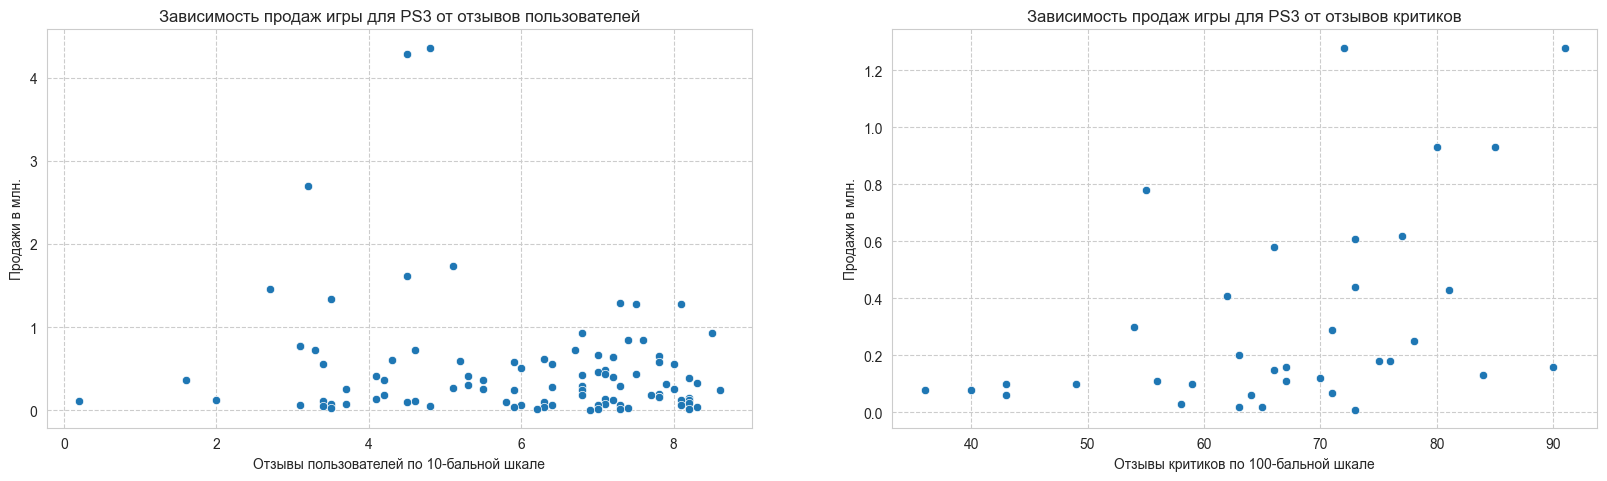

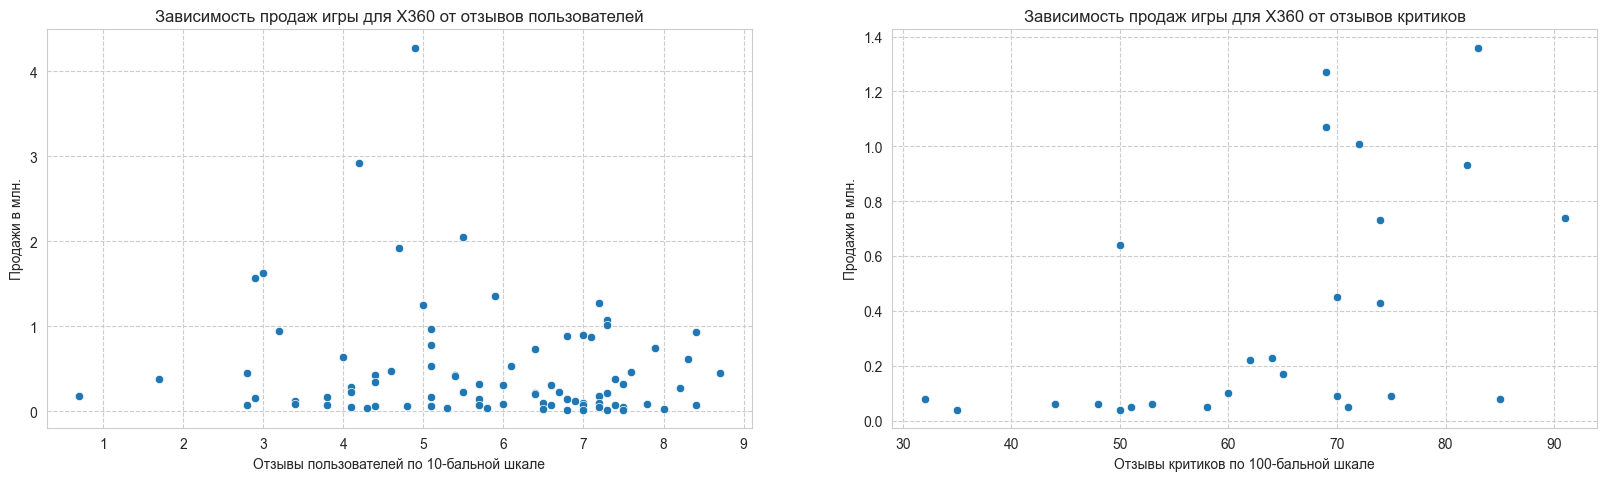

In [128]:
for i, platform in enumerate(popular_platforms.head().index):
    data_platform = data[data['platform'] == platform]
    fig = plt.figure(figsize=(20, 30))
    
    ax = fig.add_subplot(5, 2, i * 2 + 1)
    sns.scatterplot(data=data_platform, x='user_score', y='total_sales', ax=ax).set(
    title=f'Зависимость продаж игры для {platform} от отзывов пользователей',
    xlabel='Отзывы пользователей по 10-бальной шкале',
    ylabel='Продажи в млн.'
    );
    ax = fig.add_subplot(5, 2, i * 2 + 2)
    sns.scatterplot(data=data_platform, x='critic_score', y='total_sales', ax=ax).set(
    title=f'Зависимость продаж игры для {platform} от отзывов критиков',
    xlabel='Отзывы критиков по 100-бальной шкале',
    ylabel='Продажи в млн.'
    );

In [129]:
for platform in popular_platforms.head().index:
    data_platform = data[data['platform'] == platform]
    print(f'Коэффициенты кореляции для платформы {platform}.')
    
    corrs = data_platform[['total_sales', 'user_score', 'critic_score']].corr()['total_sales'].to_numpy()
    print(f'Между отзывами пользователей и продажами: {corrs[1]:.2f}')
    print(f'Между отзывами критиков и продажами: {corrs[2]:.2f}')
    print()

Коэффициенты кореляции для платформы PS4.
Между отзывами пользователей и продажами: -0.04
Между отзывами критиков и продажами: 0.40

Коэффициенты кореляции для платформы XOne.
Между отзывами пользователей и продажами: -0.07
Между отзывами критиков и продажами: 0.43

Коэффициенты кореляции для платформы 3DS.
Между отзывами пользователей и продажами: 0.22
Между отзывами критиков и продажами: 0.31

Коэффициенты кореляции для платформы PS3.
Между отзывами пользователей и продажами: -0.17
Между отзывами критиков и продажами: 0.45

Коэффициенты кореляции для платформы X360.
Между отзывами пользователей и продажами: -0.14
Между отзывами критиков и продажами: 0.53



##### Вывод.

* Между продажами и отзывами наблюдается очень слабая связь.
* Критики игр для PS4 и XOne стабильно дают хорошие оценки успешно продаваемым играм в отличие от пользователей.
* В целом пользователи достаточно часто могут поставить плохую оценку хорошо продаваемой игре.

#### Исследование популярности жанров игр.

In [130]:
genre_sales = data.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_sales.columns = ['median_sales']
genre_sales = genre_sales.sort_values(by='median_sales', ascending=False);

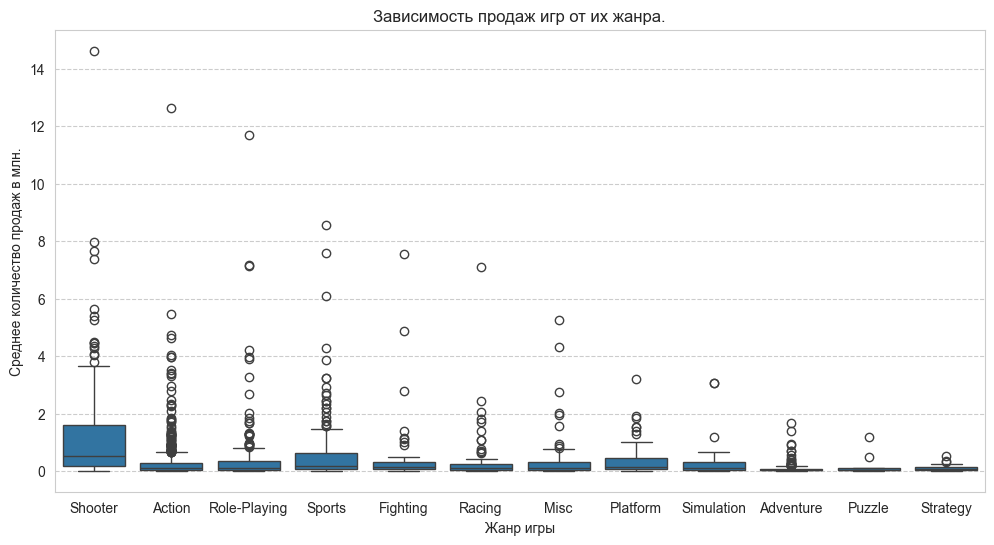

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre', y='total_sales').set(
    title='Зависимость продаж игр от их жанра.',
    xlabel='Жанр игры',
    ylabel='Среднее количество продаж в млн.'
);

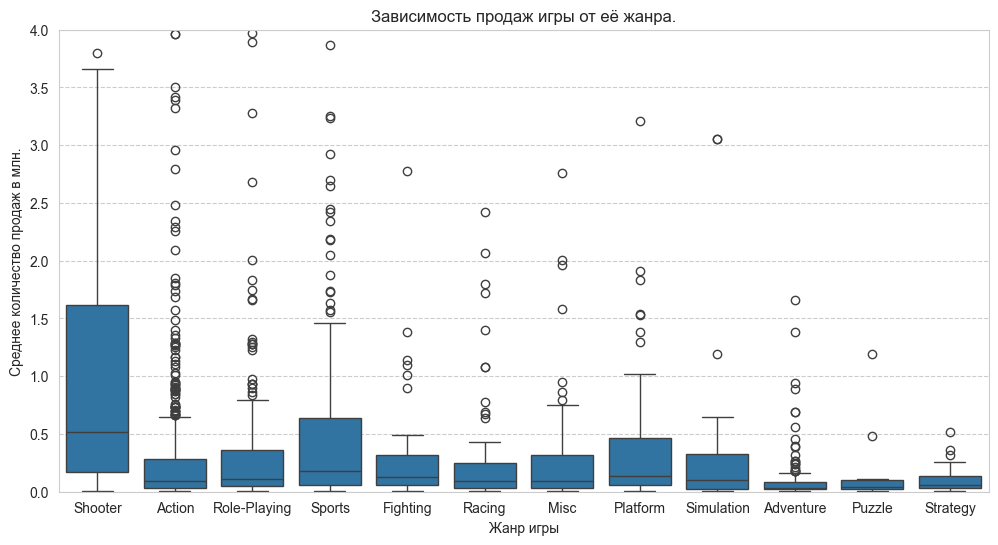

In [132]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre', y='total_sales').set(
    title='Зависимость продаж игры от её жанра.',
    xlabel='Жанр игры',
    ylabel='Среднее количество продаж в млн.',
    ylim=(0, 4)
);

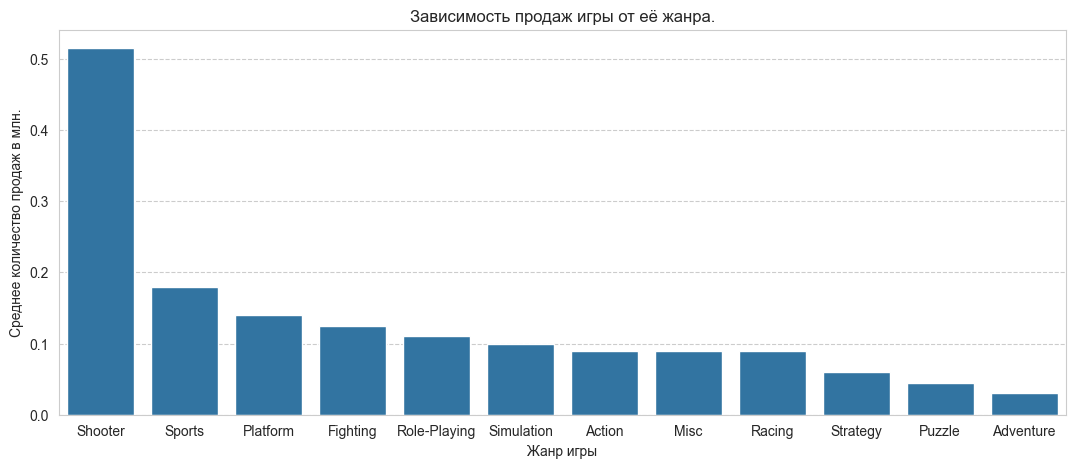

In [133]:
plt.figure(figsize=(13, 5))
sns.barplot(data=genre_sales, x=genre_sales.index, y='median_sales').set(
    title='Зависимость продаж игры от её жанра.',
    xlabel='Жанр игры',
    ylabel='Среднее количество продаж в млн.'
);

**Вывод:** стоит выделить, что особенно популярны игры в жанре Shooter, они должны быть очень выгодны для бизнеса, а такие жанры, как Adventure, Puzzle, Strategy, стоит избегать ввиду их непопулярности.

### Вывод

* Поиск актуального периода продаж.
    * С 2009-го года продажи игр падали, но в последнее время вновь наблюдается рост.
    * Благодаря построенным графикам было установлено, что средняя продолжительность актуальности платформ составляет примерно 11 лет.
* Исследование платформ.
    * Самыми перспективными платформами на 2017-й год оказались: PS4, XOne, и 3DS.
    * Игры для PS4 и XOne более 'выгодны', чем игры для 3DS, в том смысле, что, если отбросить редкие исключения, то популярные игры для PS4 и XOne продаются в больших экземплярах, чем популярные игры для 3DS.
* Исследование отзывов.
    * Между продажами и отзывами наблюдается очень слабая связь.
    * Критики игр для PS4 и XOne стабильно дают хорошие оценки успешно продаваемым играм в отличие от пользователей.
    * В целом пользователи достаточно часто могут поставить плохую оценку хорошо продаваемой игре.
* Исследование жанров.
    * На первом месте с большим отрывом располагается жанр Shooter.
    * Самыми непопулярными оказались жанры: Adventrue, Puzzle, Strategy.

## Сравнение портретов пользователей каждого региона.

Так как интернет-магазин продаёт игры по всему миру, важно изучить предпочтения пользователей каждого региона отдельно.

Для каждого региона найдем: 
1. самые популярные платформы,
2. самые популярные жанры,
3. как рейтинг ESRB влияет на продажи.

In [134]:
# Итератор для графиков
region_list = [(0, 'na_sales', 'Северной Америке'), (1, 'eu_sales', 'Европе'), (2, 'jp_sales', 'Японии'), (3, 'other_sales', 'других регионах')]
colors = sns.color_palette('pastel')[0:6]

### Самые популярные платформы.

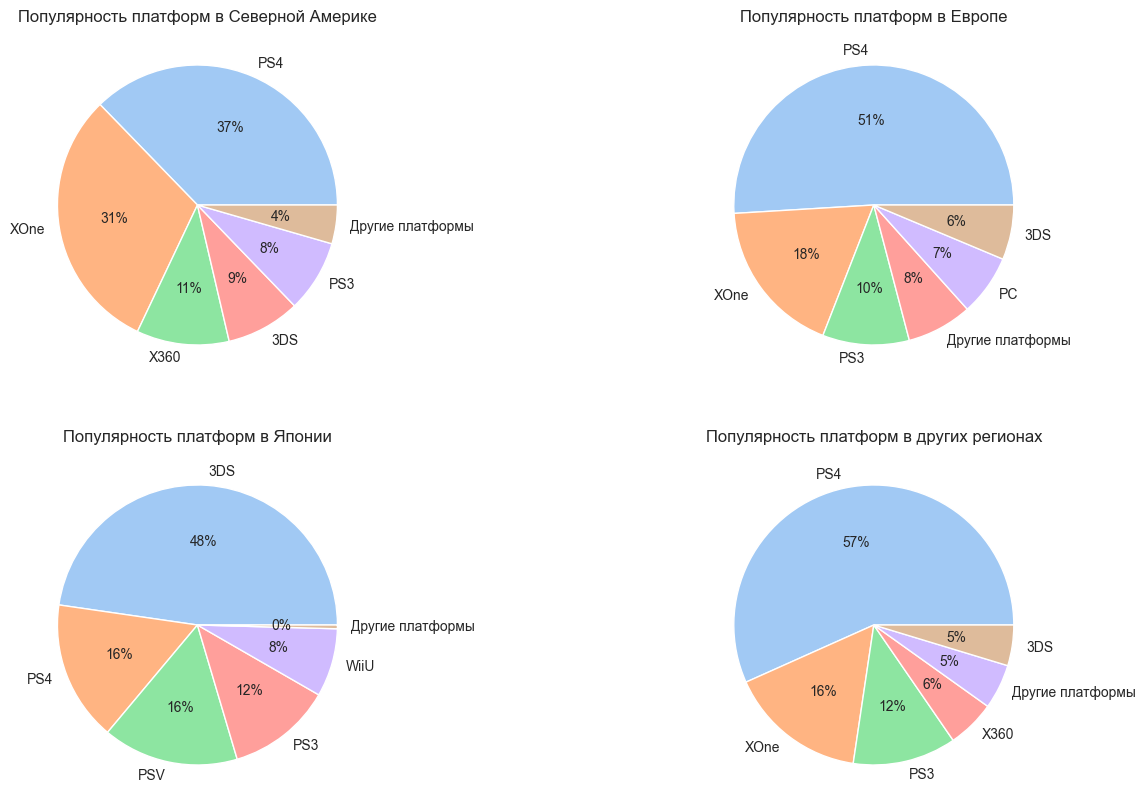

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, region_sales, region_name in region_list:
    data_pivot = data.pivot_table(index='platform', values=region_sales, aggfunc='sum').sort_values(by=region_sales, ascending=False)
    other_value = data_pivot.iloc[6:].sum()
    data_pivot = (
        pd.concat(
            [
                data_pivot.head(), 
                pd.DataFrame([other_value], index=['Другие платформы'], columns=[region_sales])
            ]
        )
        .sort_values(by=region_sales, ascending=False)
    )
    ax = axes[i // 2, i % 2]
    ax.pie(data_pivot[region_sales], labels=data_pivot.index, colors=colors, autopct='%.0f%%');
    ax.set_title(f'Популярность платформ в {region_name}')
   

**Вывод.**

Во всех регионах кроме Японии доминируют PS4 и XOne. В Японии тоже популярны игры для PS4, они занимают второе место по продажам, на первом месте располагаются игры для 3DS, а XOne в этом регионе не пользуется спросом.

### Популярные жанры.

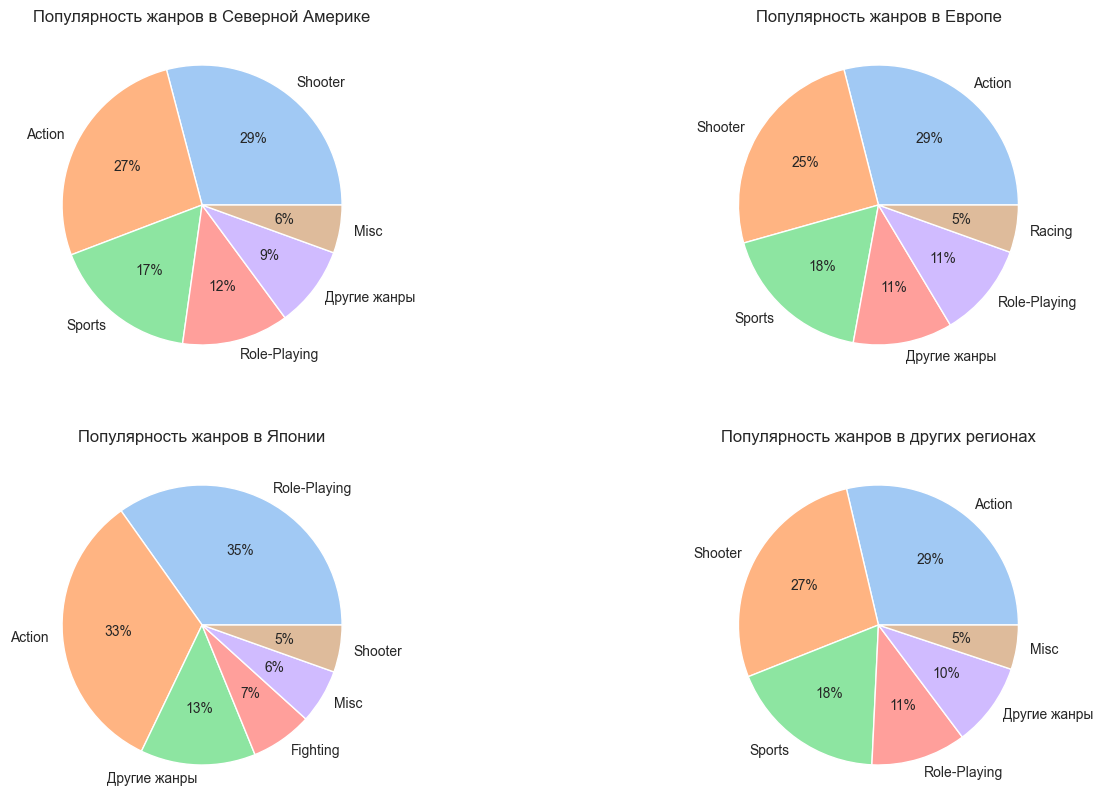

In [136]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, region_sales, region_name in region_list:
    data_pivot = data.pivot_table(index='genre', values=region_sales, aggfunc='sum').sort_values(by=region_sales, ascending=False)
    other_value = data_pivot.iloc[6:].sum()
    data_pivot = (
        pd.concat(
            [
                data_pivot.head(),
                pd.DataFrame([other_value], index=['Другие жанры'], columns=[region_sales])
            ]
        ).sort_values(by=region_sales, ascending=False)
    )
    ax = axes[i // 2, i % 2]
    ax.pie(data_pivot[region_sales], labels=data_pivot.index, colors=colors, autopct='%.0f%%');
    ax.set_title(f'Популярность жанров в {region_name}')
   

**Вывод.**

Shooter, Action, и Sports - самые популярные жанры во всех регионах кроме Японии. В Японии лидирует Role-playing, при этом Role-playing И Action вместе составляют больше половины покупаемых в Японии игр.

### Влияние рейтинга ESRB.

**Северная Америка.**

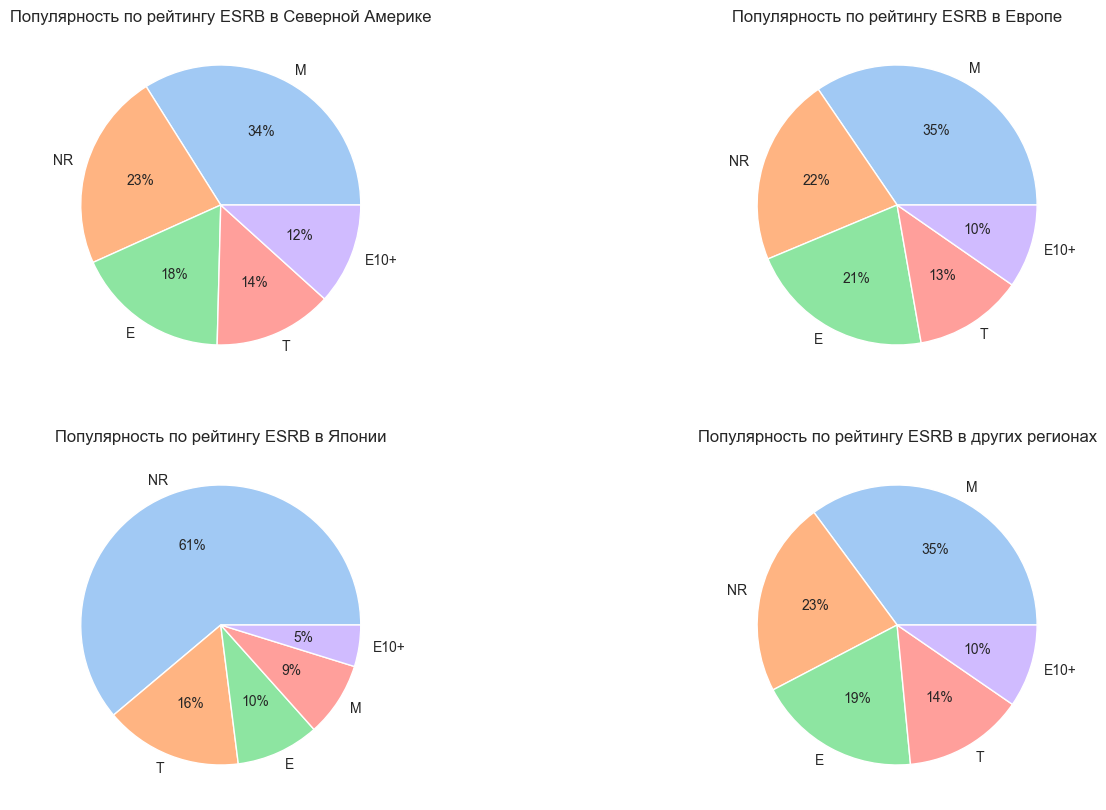

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, region_sales, region_name in region_list:
    data_pivot = data.pivot_table(index='rating', values=region_sales, aggfunc='sum').sort_values(by=region_sales, ascending=False)
    other_value = data_pivot.iloc[6:].sum()
    data_pivot = (
        data_pivot
        .sort_values(by=region_sales, ascending=False)
    )
    ax = axes[i // 2, i % 2]
    ax.pie(data_pivot[region_sales], labels=data_pivot.index, colors=colors, autopct='%.0f%%');
    ax.set_title(f'Популярность по рейтингу ESRB в {region_name}')
   

**Вывод.**
Во всех регионах продажи игр без рейтинга ESRB составляют больше 20% общих продаж, но особенно много таких игр в Японии. Видимо, японские издатели не заинтересованы в получении рейтинга ESRB для их игр, так как он используется только в США, Канаде, и Мексике. В Европе так же существует другая система рейтинга игр. В остальных регионах наибольших продаж достигают игры из категории M (для взрослых).

### Вывод

В целом наблюдается схожесть в предпочтениях пользователей Северной Америки и Европы. Однако интересы пользователей Японии отличаются от пользователей других регионов.

Несколько ключевых результатов этого раздела:
* Во всех регионах кроме Японии доминируют PS4 и XOne доминируют. В Японии так же популярны игры для PS4, они занимают второе место по продажам, на первом месте располагаются игры для 3DS, а XOne в этом регионе не пользуется спросом.
* Shooter, Action, и Sports - самые популярные жанры во всех регионах кроме Японии. В Японии лидирует Role-playing, при этом Role-playing И Action вместе составляют больше половины покупаемых в Японии игр.
* Во всех регионах продажи игр без рейтинга ESRB составляют больше 20% общих продаж, но особенно много таких игр в Японии. Видимо, японские издатели не заинтересованы в получении рейтинга ESRB для их игр, так как он используется только в США, Канаде, и Мексике. В Европе так же существует другая система рейтинга игр. В остальных регионах наибольших продаж достигают игры из категории M (для взрослых).

## Проверка гипотез.

In [138]:
alpha = 0.01 # Уровень стат. значимости.

На этом этапе изучим:

1. Близость пользовательских рейтингов игр для популярной консоли XOne и игр для компьютера (PC).
2. Близость пользовательских рейтингов игр в двух популярных жанрах 'Sports' (игры про спорт) и 'Action' (экшен-игры).

### Сравнение средних пользовательских рейтингов игр для Xbox One и PC.

Проверим гипотезу:

$H_0:$ Средний пользовательский рейтинг игр для Xbox One и PC совпадает.  Стат. значимых различий нет.

$H_1:$ Средний пользовательский рейтинг игр для Xbox One и PC отличается. Стат. значимые различия есть.

Это гипотеза о равенстве средних двух генеральных совокупностей с двусторонней альтернативой. Для её проверки можно применить t-тест, с параметром `equal_var=False`, так как размеры выборок разные.

Сначала убедимся, что размеры выборок, действительно, разные, и посмотрим на средние значения выборок.

In [139]:
xone_user_score = data.query('platform == "XOne"')['user_score'].dropna()
pc_user_score = data.query('platform == "PC"')['user_score'].dropna()
print('Количество игр для XOne:', len(xone_user_score))
print('Количество игр для PC:', len(pc_user_score))
print()
print('Средняя оценка выборки игр для XOne:', xone_user_score.mean())
print('Средняя оценка выборки игр для PC:', pc_user_score.mean())

Количество игр для XOne: 165
Количество игр для PC: 122

Средняя оценка выборки игр для XOne: 6.594545454545456
Средняя оценка выборки игр для PC: 6.298360655737705


Теперь, когда мы убедились, что размеры выборок разные и выбран правильный параметр проверим гипотезу.

In [140]:
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативы')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.11601398086668832
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** гипотеза отвергается в пользу альтернативы, то есть можно утверждать, что пользовательский рейтинг игр для XOne и PC отличается.

### Сравнение средних пользовательских рейтингов игр в жанрах Action и Sports.

Аналогично проверим следующую гипотезу:

$H_0:$ Средний пользовательский рейтинг игр в жанрах Action и Sports совпадает.  Стат. значимых различий нет.

$H_1:$ Средний пользовательский рейтинг игр в жанрах Action и Sports отличается. Стат. значимые различия есть.

Это тоже гипотеза о равенстве средних двух генеральных совокупностей с двусторонней альтернативой. Для её проверки можно применить t-тест, с параметром `equal_var=False`, так как размеры выборок разные.

Убедимся, что размеры выборок, действительно, разные, и посмотрим на средние значения выборок.

In [141]:
action_user_score = data.query('genre == "Action"')['user_score'].dropna()
sports_user_score = data.query('genre == "Sports"')['user_score'].dropna()
print('Количество игр в жанре Action:', len(action_user_score))
print('Количество игр в жанре Sports:', len(sports_user_score))
print()
print('Средняя оценка выборки игр в жанре Action:', action_user_score.mean())
print('Средняя оценка выборки игр в жанре Sports:', sports_user_score.mean())

Количество игр в жанре Action: 297
Количество игр в жанре Sports: 127

Средняя оценка выборки игр в жанре Action: 6.760606060606061
Средняя оценка выборки игр в жанре Sports: 5.2251968503937


In [142]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативы')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу в пользу альтернативы


**Вывод:** гипотеза отвергается в пользу альтернативы, то есть можно утверждать, что пользовательский рейтинг игр в жанрах 'Action' и 'Sports' отличается.

## Общий вывод.

### Обзор и предобработка данных.

* Имена столбцов были приведены к стилю `snake_case`.
* Всего только у 2-х игр не было жанра и названия, они были отброшены, так как их рейтинги тоже оставались неизвестны. Это были очень старые игры, возможно, все данные об этих играх были утеряны одновременно, например, при копировании информации о них из другой базы данных, и далее их названия восстановить не удалось.
* Пропуски в столбце года выпуска игр заполнить не удалось, данные с пропусками были отброшены. Тип данных был исправлен, скорее всего, данные были заполнены верными значениями, но при заполнении пользователем или программой был выбран неверный тип данных. Возможно пропуски возникли из-за неправильного типа данных, например, таблица при получении целочисленного значения в столбец года выпуска, не приводила его к вещественному типу, а оставляла пропуск. 
* Отзывы игроков содержали значение `tbd`, to be delivered - (с англ.) подлежит уточнению. Это значение было отброшено, и столбец был преобразован к типу `int`. К сожалению отзывы не коррелируют ни с чем в этой таблице: количество продаж не отражает качество игры, то же касается жанра и года выхода игры. Также известно, что игроки и критики часто дают очень разные оценки играм, поэтому пропуски заполнить не удалось. Пропуски могли появится из-за того, что на тех ресурсах, откуда берут отзывы игроков и критиков, их было недостаточно.
* В данных встречалась устаревшая возрастная категория 'K-A', которая на данный момент называется 'E', в связи с этим я заменил значение 'K-A' на 'E' таблице. Пропуски были помечены строкой 'NR' (no rating). Скорее всего, большинство пропусков указывают на игры без рейтинга ESRB. Рейтинг ESRB используется только в Канаде, Америке, и Мексике. Учитывая, что в этих данных есть игры из Европы, Японии, и других регионов, неудивительно, что, у части игр нет рейтинга.
* В данных был найден только один неявный дубликат, совпадало всё кроме продаж. Возможно, игру добавили с примерно нулевыми продажами и хотели их заполнить позже, но потом забыли, и создали новую запись с той же игрой.

> **Замечания и рекомендации.**
> * Для более точного исследования связи между продажами игр и отзывами рекомендуется использовать дополнительные источники информации.
> * В будущем при обработке данных заменять категорию 'K-A' на 'E', скорее всего, не потребуется, потому что в записях с 1998-го года она перестаёт встречаться.
> * Вряд ли тип данных столбца отзывов игроков удастся изменить, из-за значения `tbd`, поэтому его придется обрабатывать каждый раз.

### Исследовательский анализ данных.

* Поиск актуального периода продаж.
    * С 2009-го года продажи игр падали, но в последнее время вновь наблюдается рост.
    * Благодаря построенным графикам было установлено, что средняя продолжительность актуальности платформ составляет примерно 11 лет.
* Исследование платформ.
    * Самыми перспективными платформами на 2017-й год оказались: PS4, XOne, и 3DS.
    * Игры для PS4 и XOne более 'выгодны', чем игры для 3DS, в том смысле, что, если отбросить редкие исключения, то популярные игры для PS4 и XOne продаются в больших экземплярах, чем популярные игры для 3DS.
* Исследование отзывов.
    * Между продажами и отзывами наблюдается очень слабая связь.
    * Критики игр для PS4 и XOne стабильно дают хорошие оценки успешно продаваемым играм в отличие от пользователей.
    * В целом пользователи достаточно часто могут поставить плохую оценку хорошо продаваемой игре.
* Исследование жанров.
    * На первом месте с большим отрывом располагается жанр Shooter.
    * Самыми непопулярными оказались жанры: Adventrue, Puzzle, Strategy.
    * График, приложенный ниже, более подробно описывает продажи игр различных жанров. 

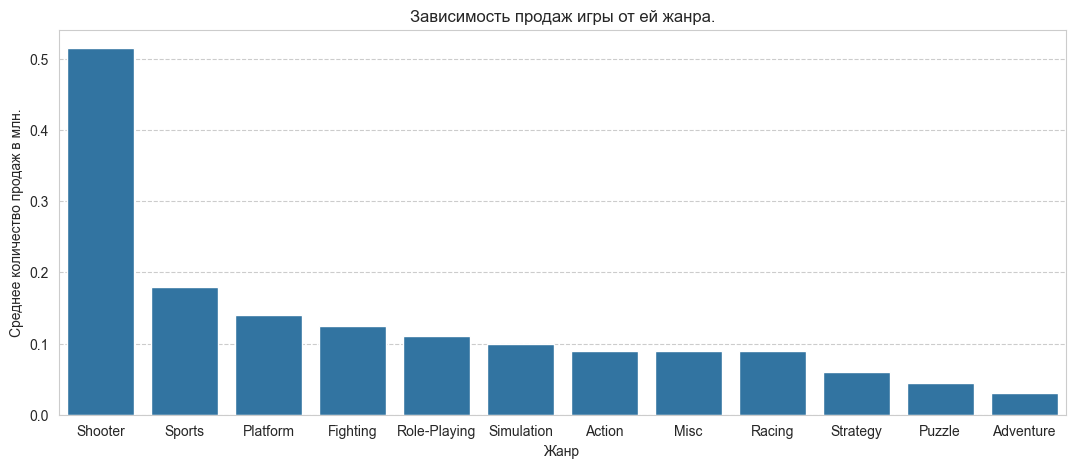

In [143]:
plt.figure(figsize=(13, 5))
sns.barplot(data=genre_sales, x=genre_sales.index, y='median_sales').set(
    title='Зависимость продаж игры от ей жанра.',
    xlabel='Жанр',
    ylabel='Среднее количество продаж в млн.'
);

> **Замечания и рекомендации.**
> * На 2017 год самыми потенциально прибыльными платформами оказались PS4 и XOne.
> * Рекомендуется обратить внимание на популярность жанров внутри каждого региона, об этом будет сказано позже.
> * В будущем может оказаться необходимым перерассчитать период акутальности платформ.

### Сравнение портретов пользователей каждого региона.

В целом наблюдается схожесть в предпочтениях пользователей Северной Америки и Европы. Однако интересы пользователей Японии отличаются от пользователей других регионов.

Несколько ключевых результатов этого раздела:
* Во всех регионах кроме Японии доминируют PS4 и XOne доминируют. В Японии так же популярны игры для PS4, они занимают второе место по продажам, на первом месте располагаются игры для 3DS, а XOne в этом регионе не пользуется спросом.
* Shooter, Action, и Sports - самые популярные жанры во всех регионах кроме Японии. В Японии лидирует Role-playing, при этом Role-playing И Action вместе составляют больше половины покупаемых в Японии игр.
* Во всех регионах продажи игр без рейтинга ESRB составляют больше 20% общих продаж, но особенно много таких игр в Японии. Видимо, японские издатели не заинтересованы в получении рейтинга ESRB для их игр, так как он используется только в США, Канаде, и Мексике. В Европе так же существует другая система рейтинга игр. В остальных регионах наибольших продаж достигают игры из категории M (для взрослых).
> **Замечание о регионах:** игры в жанре Shooter очень популярны в Северной Америке и Европе, но не входят в топ-5 Японии. Самый популярный жанр в Японии - Role-Playing, он не встречается в топ-5 Европы, но занимает 5-ую позицию в Северной Америке

### Проверка гипотез.

Были сформулированы и проверены 2 следующие гипотезы на уровне стат. значимости $\alpha = 0.01$:
1. Близость пользовательских рейтингов игр для популярной консоли XOne и игр для компьютера (PC).

    $H_0:$ Средний пользовательский рейтинг игр для Xbox One и PC совпадает.  Стат. значимых различий нет.

    $H_1:$ Средний пользовательский рейтинг игр для Xbox One и PC отличается. Стат. значимые различия есть.

   **Результат:** гипотеза была отвергнута в пользу альтернативы, то есть можно утверждать, что пользовательский рейтинг игр для XOne и PC отличается.

2. Близость пользовательских рейтингов игр в двух популярных жанрах 'Sports' (игры про спорт) и 'Action' (экшен-игры).

    $H_0:$ Средний пользовательский рейтинг игр в жанрах Action и Sports совпадает.  Стат. значимых различий нет.

    $H_1:$ Средний пользовательский рейтинг игр в жанрах Action и Sports отличается. Стат. значимые различия есть.

    **Результат:** гипотеза отвергается в пользу альтернативы, то есть можно утверждать, что пользовательский рейтинг игр в жанрах 'Action' и 'Sports' отличается.

>**Замечание о гипотезах:** обе гипотезы являются гипотезами о равенстве средних двух генеральных совокупностей, для их проверки был использован t-тест, с параметром `equal_var=False`, так как выборки были разного размера. В дальнейшем для проверки гипотез о равенстве средних рекомендуется также использовать t-тест и уделять особоен внимание размеру выборок, в случае совпадения размеров выборок и большого количества наблюдений лучше использовать значение параметра `equal_var=True`.

### Какие игры будут потенциально популярны в 2017-м году?

Ниже составлены портреты потенциально популярных игр для каждого региона, которыми можно воспользоваться для проведения рекламных компаний.

**Северная Америка.**
* **Платформы:** PS4 или XOne. 
* **Жанры:** Shooter, Action, Sports.
* **Рейтинг ESRB:** M, без рейтинга.

**Европа.**
* **Платформы:** PS4. 
* **Жанры:** Shooter, Action, Sports.
* **Рейтинг ESRB:** M, E, без рейтинга.

**Япония.**
* **Платформы:** 3DS. 
* **Жанры:** Role-Playing, Action.
* **Рейтинг ESRB:** без рейтинга.

**Другие регионы.**
* **Платформы:** PS4. 
* **Жанры:** Shooter, Action, Sports.
* **Рейтинг ESRB:** M, без рейтинга.